In [1]:
#more we minimize the training error ,,, bigger is the test error
#small training error
#challenge : underfitting 
#high training error or gap between test and training error grows larger 
#challenge : overfitting
# underfitting occurs when your model isn't provided sufficient capacity for to be able to capture the data and underlined trend and thus not able to
# fit the training set


NameError: name 'underfitting' is not defined

In [2]:
!pip3 install torchvision

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 330.3 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.2 MB 919.0 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.2 MB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.2 MB 2.6 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.4 MB/s eta 0:00:00


In [3]:
import torch
from torchvision import datasets, transforms

In [5]:
import matplotlib.pyplot as plt
import numpy as np

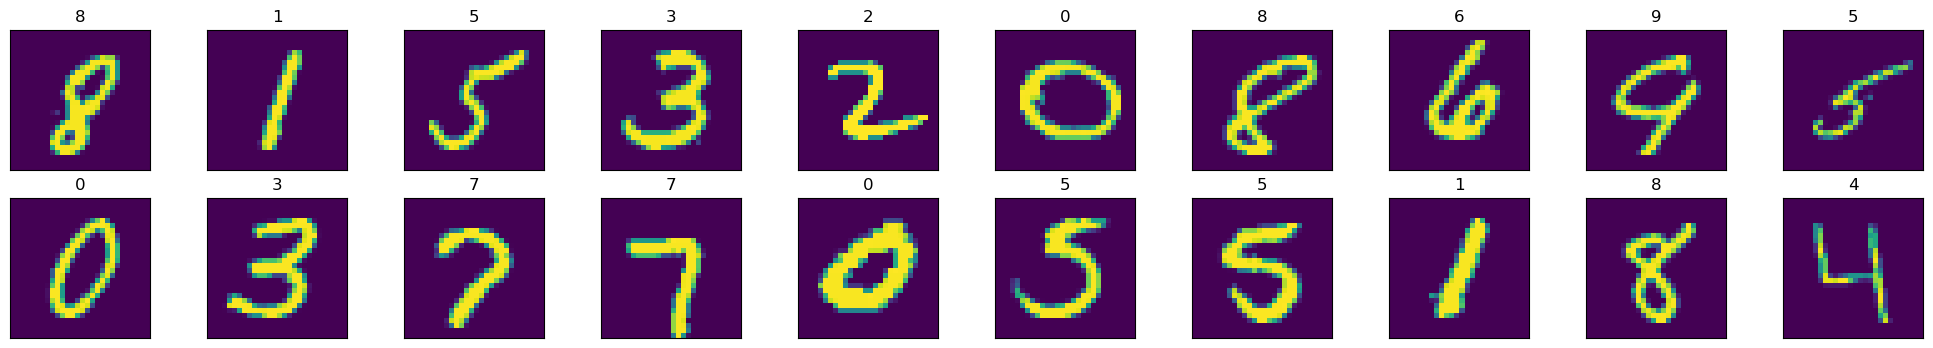

In [31]:

'''dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray')
    ax.set_title(str(labels[idx].item()))
plt.show()'''

# Get a batch of training data
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Plot the images
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(str(labels[idx].item()))
plt.show()

In [36]:
#neural network implementation
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)


In [45]:
def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [46]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [82]:


import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [83]:
devices = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [50]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)



In [51]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

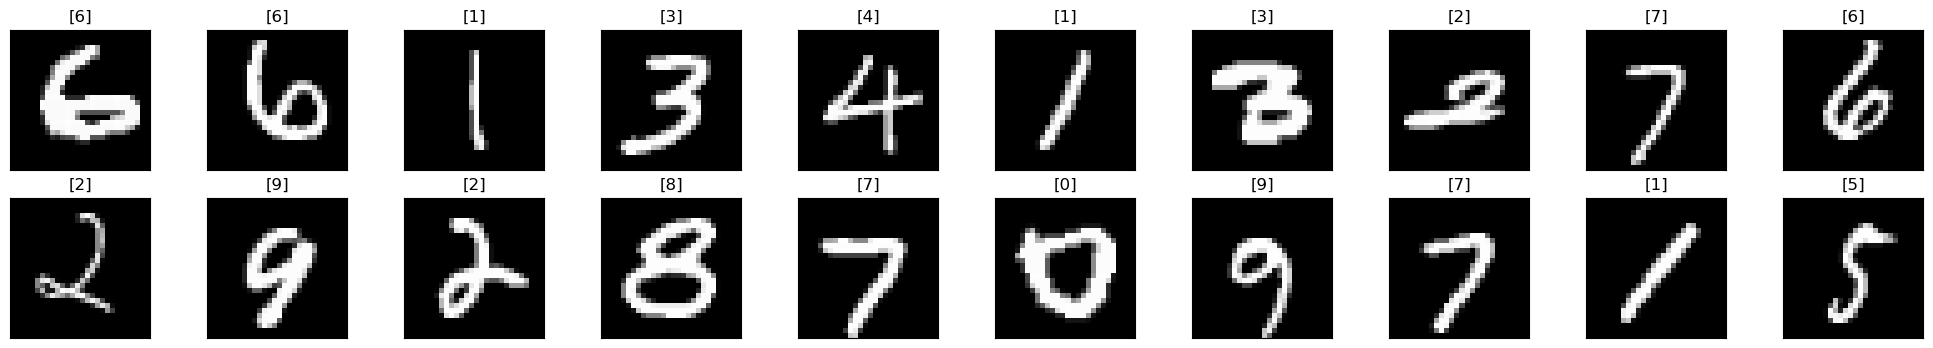

In [53]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [54]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [55]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [57]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))
     

epoch : 1
training loss: 0.9386, acc 77.1150 
validation loss: 0.4236, validation acc 88.8800 
epoch : 2
training loss: 0.3819, acc 89.2850 
validation loss: 0.3253, validation acc 90.9300 
epoch : 3
training loss: 0.3236, acc 90.7100 
validation loss: 0.2876, validation acc 91.7400 
epoch : 4
training loss: 0.2914, acc 91.5350 
validation loss: 0.2718, validation acc 91.9700 
epoch : 5
training loss: 0.2658, acc 92.3650 
validation loss: 0.2457, validation acc 92.9400 
epoch : 6
training loss: 0.2444, acc 92.9950 
validation loss: 0.2334, validation acc 93.1000 
epoch : 7
training loss: 0.2263, acc 93.5550 
validation loss: 0.2133, validation acc 93.9800 
epoch : 8
training loss: 0.2094, acc 94.0300 
validation loss: 0.1986, validation acc 94.1500 
epoch : 9
training loss: 0.1949, acc 94.4300 
validation loss: 0.1908, validation acc 94.5600 
epoch : 10
training loss: 0.1821, acc 94.8217 
validation loss: 0.1798, validation acc 94.5900 
epoch : 11
training loss: 0.1703, acc 95.1617 
va

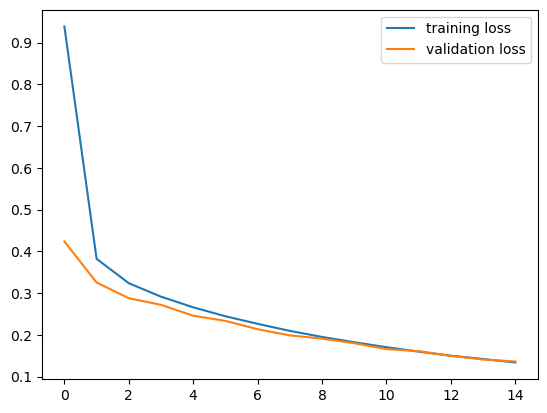

In [59]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

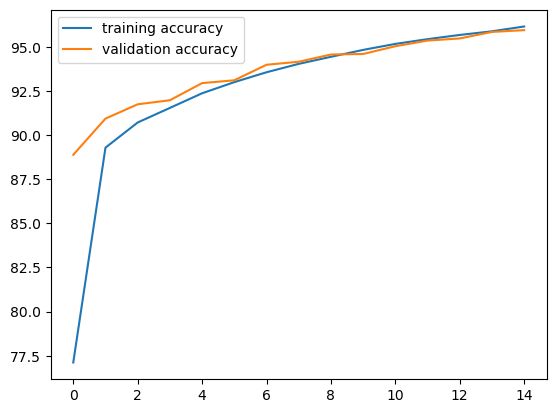

In [60]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [61]:
!pip3 install pillow==4.0.0

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.1 MB 5.8 MB/s eta 0:00:02
      --------------------------------------- 0.2/11.1 MB 2.4 MB/s eta 0:00:05
     - -------------------------------------- 0.4/11.1 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/11.1 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/11.1 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/11.1 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/11.1 MB 2.3 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/11.1 MB 2.3 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/11.1 MB 2.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.2/11.1 MB 2.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/11.1 MB 2.3 MB/s eta 0:00:05
     ----- ---------------------------------- 1.4/11.1 MB 2

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [180 lines of output]
  Single threaded build for windows
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\PIL
  copying PIL\BdfFontFile.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\BmpImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\BufrStubImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\ContainerIO.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\CurImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\DcxImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\DdsImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\EpsImagePlugin.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\ExifTags.py -> build\lib.win-amd64-cpython-311\PIL
  copying PIL\features.py -> 

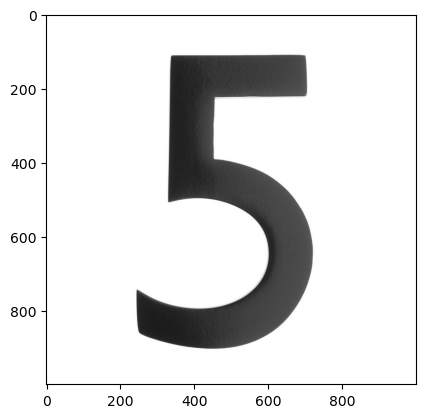

In [65]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [67]:
import PIL.ImageOps

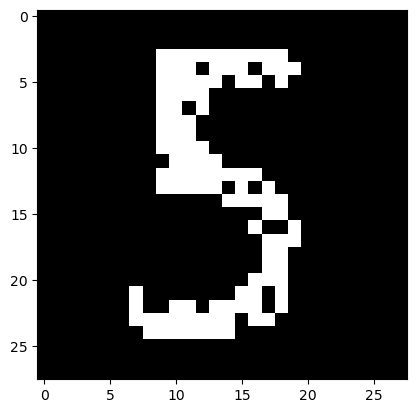

In [70]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) 
plt.imshow(im_convert(img))

In [71]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


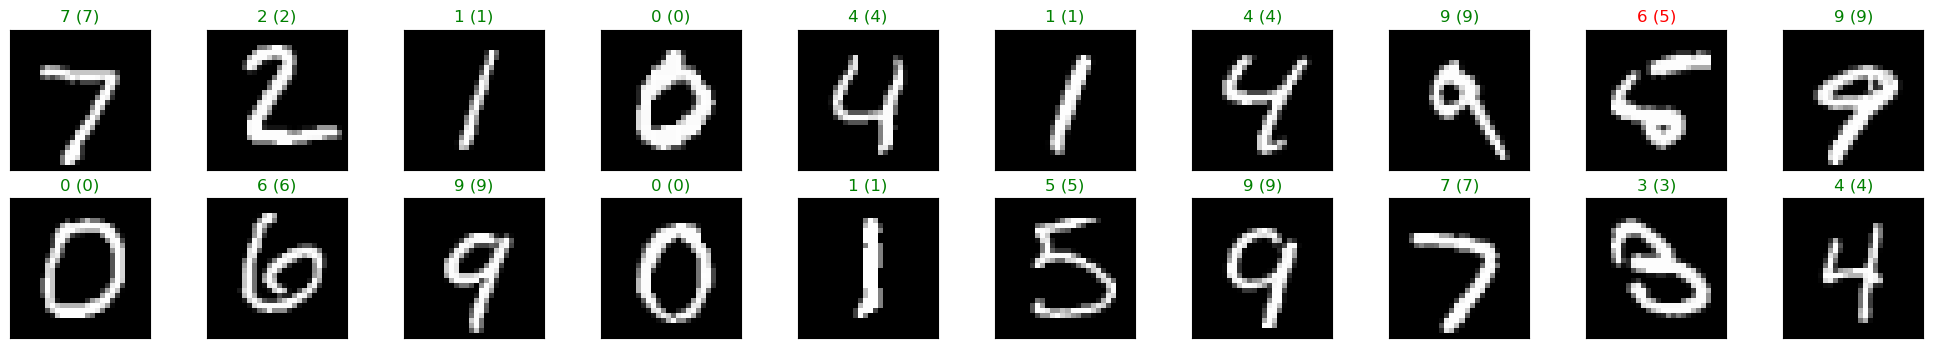

In [73]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))
     

In [79]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 =  nn.Conv2d(1,20,5,1)
        self.conv2 =  nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [87]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [89]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [90]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))
     

epoch : 1
training loss: 0.5130, acc 87.0367 
validation loss: 0.1588, validation acc 95.5300 
epoch : 2
training loss: 0.1245, acc 96.3317 
validation loss: 0.0815, validation acc 97.5600 
epoch : 3
training loss: 0.0814, acc 97.5383 
validation loss: 0.0662, validation acc 97.9700 
epoch : 4
training loss: 0.0617, acc 98.1433 
validation loss: 0.0507, validation acc 98.5100 
epoch : 5
training loss: 0.0514, acc 98.4583 
validation loss: 0.0438, validation acc 98.5600 
epoch : 6
training loss: 0.0442, acc 98.6683 
validation loss: 0.0377, validation acc 98.8100 
epoch : 7
training loss: 0.0392, acc 98.7967 
validation loss: 0.0338, validation acc 98.9200 
epoch : 8
training loss: 0.0336, acc 98.9717 
validation loss: 0.0323, validation acc 98.9900 
epoch : 9
training loss: 0.0306, acc 99.0467 
validation loss: 0.0330, validation acc 98.9100 
epoch : 10
training loss: 0.0273, acc 99.1783 
validation loss: 0.0349, validation acc 98.8300 
epoch : 11
training loss: 0.0240, acc 99.2700 
va

NameError: name 'device' is not defined